In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
delhi=pd.read_csv("Data/testset.csv")

In [7]:
delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [8]:
delhi.drop([' _precipm',' _pressurem',' _heatindexm',' _hum',' _thunder',' _tornado',' _vism',' _wdird',' _wdire',' _wgustm',' _windchillm',' _wspdm'],axis='columns',inplace=True)
delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_rain,_snow,_tempm
0,19961101-11:00,Smoke,9.0,0,0,0,0,30.0
1,19961101-12:00,Smoke,10.0,0,0,0,0,28.0
2,19961101-13:00,Smoke,11.0,0,0,0,0,24.0
3,19961101-14:00,Smoke,10.0,0,0,0,0,24.0
4,19961101-16:00,Smoke,11.0,0,0,0,0,23.0


In [9]:
delhi['datetime_utc']=pd.to_datetime(delhi['datetime_utc'])
delhi['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [12]:
delhi.describe()

,_dewptm,_fog,_hail,_rain,_snow,_tempm
count,100369.000000,100990.000000,100990.000000,100990.000000,100990.000000,100317.000000
mean,15.741205,0.069690,0.000129,0.026260,0.000010,25.451269
std,7.058587,0.254625,0.011345,0.159908,0.003147,8.482859
min,-24.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000
75%,22.000000,0.000000,0.000000,0.000000,0.000000,32.000000
max,75.000000,1.000000,1.000000,1.000000,1.000000,90.000000


In [13]:
delhiplot=delhi[['datetime_utc',' _tempm']].copy()
delhiplot['just_date'] = delhiplot['datetime_utc'].dt.date

delhifinal=delhiplot.drop('datetime_utc',axis=1)



delhifinal.set_index('just_date', inplace= True)

delhifinal.head()

,_tempm
just_date,
1996-11-01,30.0
1996-11-01,28.0
1996-11-01,24.0
1996-11-01,24.0
1996-11-01,23.0


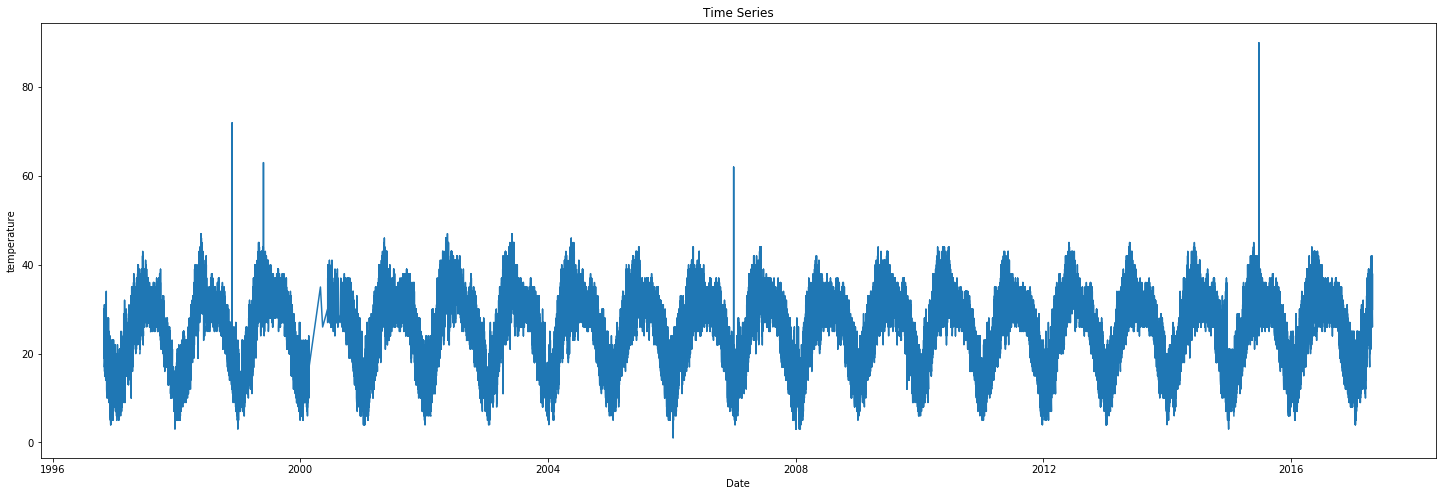

In [14]:
plt.figure(figsize=(25,8))
plt.plot(delhifinal)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()


In [15]:
cond=delhi[' _conds'].unique()
for values in cond:
    print(values)


Smoke
Clear
Haze
Unknown
Scattered Clouds
Shallow Fog
Mostly Cloudy
Fog
Partly Cloudy
Patches of Fog
Thunderstorms and Rain
Overcast
Rain
Light Rain
Light Drizzle
Drizzle
Mist
Volcanic Ash
Thunderstorm
Light Thunderstorms and Rain
Light Thunderstorm
Squalls
Heavy Rain
Light Haze
Sandstorm
Widespread Dust
Funnel Cloud
Heavy Thunderstorms and Rain
Heavy Thunderstorms with Hail
Light Rain Showers
Thunderstorms with Hail
nan
Partial Fog
Light Fog
Heavy Fog
Blowing Sand
Light Hail Showers
Light Sandstorm
Light Freezing Rain
Rain Showers


In [16]:
smoke=delhi[' _conds'][delhi[' _conds'] == 'Smoke'].count()
print(smoke)

20760


In [17]:
rain=delhi[' _conds'][delhi[' _conds'] == 'Rain'].count()
print(rain)

394


In [18]:
clear=delhi[' _conds'][delhi[' _conds'] == 'Clear'].count()
print(clear)


3129


In [19]:
fog=delhi[' _conds'][delhi[' _conds'] == 'Fog'].count()
print(fog)

2760


In [20]:
Mist=delhi[' _conds'][delhi[' _conds'] == 'Mist'].count()
print(Mist)

9375


In [21]:
Dust=delhi[' _conds'][delhi[' _conds'] == 'Widespread Dust'].count()
print(Dust)

2856


In [22]:
Heavy=delhi[' _conds'][delhi[' _conds'] == 'Heavy Fog'].count()
print(Heavy)

421


Text(0.5, 0.98, 'Categorical Plotting')

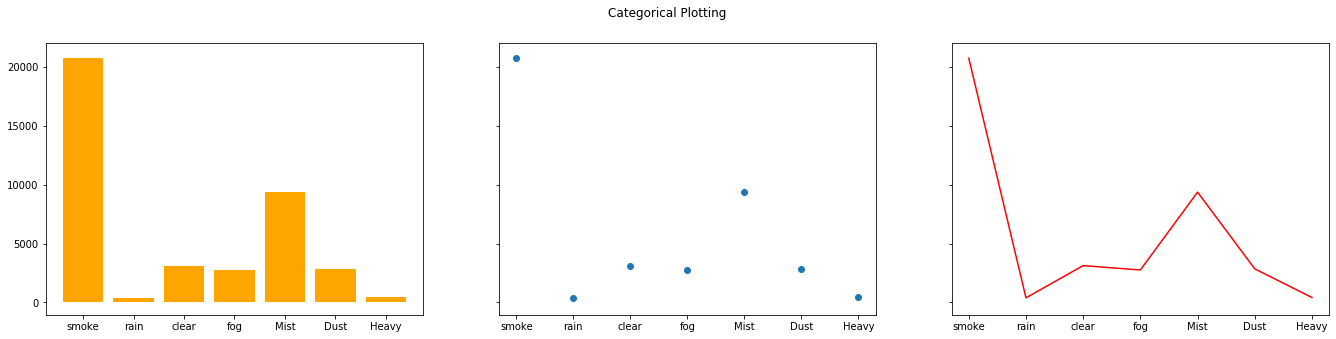

In [23]:
data = {'smoke': smoke,'rain':rain,'clear':clear,'fog':fog,'Mist':Mist,'Dust':Dust,'Heavy':Heavy}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
axs[0].bar(names, values,color='Orange')
axs[1].scatter(names, values)
axs[2].plot(names, values, color='Red')
fig.suptitle('Categorical Plotting')